In [1]:
# !pip install mplsoccer
# !pip install statsbombpy

In [2]:
from mplsoccer.pitch import Pitch
import matplotlib.patches as patches
import matplotlib.pyplot as plt
from statsbombpy import sb
import pandas as pd
import numpy as np
import warnings
import ast
import os
import sys
from pandas.errors import SettingWithCopyWarning
from statsbombpy.api_client import NoAuthWarning

warnings.simplefilter(action='ignore', category=SettingWithCopyWarning)
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.simplefilter(action='ignore', category=NoAuthWarning)

In [3]:
parent_dir = os.path.abspath(os.path.join(os.path.dirname("./"), '..'))
sys.path.append(parent_dir)
from tools.draw_pitch_plot import Draw_Pitch_Actions

<br><br><br><br>
### Jupyter - loading_bar_html

In [4]:
from IPython.display import display, HTML
loading_bar_html = """
<div id="progress-container" style="width: 50%; border: 1px solid #ccc; margin: 20px 0;">
  <div id="progress-bar" style="width: 0%; height: 20px; background-color: #4CAF50; text-align: center; line-height: 20px; color: white;"></div>
</div>
<script>
function updateProgressBar(progress) {
  var progressBar = document.getElementById('progress-bar');
  progressBar.style.width = progress + '%';
  progressBar.innerHTML = progress + '%';
}
</script>
"""

<br><br><br><br>
# PITCH SIZES

In [5]:
PITCH_SIZE_Y_SQUARES=24
PITCH_SIZE_X_SQUARES=16
PITCH_TOTAL_SQUARES=PITCH_SIZE_Y_SQUARES*PITCH_SIZE_X_SQUARES

<br><br><br><br>
# sb.matches

In [6]:
# competition_id = 9
# season_id = 281
# all_events = []
# matches = sb.matches(competition_id=competition_id, season_id=season_id)
# matches_ids = matches["match_id"] #[3895074] #matches["match_id"]
# match_number = len(matches_ids)

In [7]:
# competition_id = 9
# season_id = 281
# all_events = []
# matches = sb.matches(competition_id=competition_id, season_id=season_id)
# matches_ids = matches["match_id"] #[3895074] #matches["match_id"]
# match_number = len(matches_ids)

# display(HTML(loading_bar_html)) # loading_bar_html
# for process, match_id in enumerate(matches_ids):
#     events = sb.events(match_id=match_id)
#     all_events.append(events) 
#     progress = int((process + 1) / match_number * 100) # loading_bar_html
#     display(HTML("<script>updateProgressBar({})</script>".format(progress))) # loading_bar_html
# print("__completed__!")
# master_events_df = pd.concat(all_events, ignore_index=True)

In [8]:
# competition_id = 7
# season_id = 235
# all_events = []
# matches = sb.matches(competition_id=competition_id, season_id=season_id)
# matches_ids = matches["match_id"] #[3895074] #matches["match_id"]
# match_number = len(matches_ids)

# display(HTML(loading_bar_html)) # loading_bar_html
# for process, match_id in enumerate(matches_ids):
#     events = sb.events(match_id=match_id)
#     all_events.append(events) 
#     progress = int((process + 1) / match_number * 100) # loading_bar_html
#     display(HTML("<script>updateProgressBar({})</script>".format(progress))) # loading_bar_html
# print("__completed__!")
# master_events_df = pd.concat(all_events, ignore_index=True)

<br><br><br><br>
# ast.literal_eval(master_events_df)

In [9]:
# master_events_df = pd.read_csv("data/Bayer Leverkusen Bundesliga 23-24 Statsbomb Events Data.csv", low_memory=False)
# master_events_df = pd.read_csv("./data/master_events_processed.csv", low_memory=False)
master_events_df = pd.read_csv("./data/Ligue1 22-23 Statsbomb Events Data.csv", low_memory=False)

In [10]:
# position_mapping = {
#     'Right Center Forward': 'ST',
#     'Left Center Forward': 'ST',
#     'Center Back': 'DC',
#     'Right Center Back': 'DC',
#     'Right Wing Back': 'WBR',
#     'Goalkeeper': 'GK',
#     'Left Center Back': 'DC',
#     'Left Defensive Midfield': 'DM',
#     'Right Defensive Midfield': 'DM',
#     'Center Forward': 'ST',
#     'Left Wing Back': 'WBL',
#     'Right Center Midfield': 'MC',
#     'Right Attacking Midfield': 'AMR',
#     'Left Center Midfield': 'MC',
#     'Left Attacking Midfield': 'AML',
#     'Center Defensive Midfield': 'DM',
#     'Center Attacking Midfield': 'AMC',
#     'Right Back': 'DR',
#     'Left Back': 'DL',
#     'Right Wing': 'AMR',
#     'Left Wing': 'AML',
#     'Right Midfield': 'MR',
#     'Left Midfield': 'ML'
# }

# master_events_df['Pos'] = master_events_df['position'].map(position_mapping)
# master_events_df.to_csv("./data/Ligue1 22-23 Statsbomb Events Data.csv", index=False)

In [11]:
master_events_df.type.unique()

array(['Starting XI', 'Half Start', 'Pass', 'Ball Receipt*', 'Carry',
       'Pressure', 'Dribble', 'Duel', 'Dribbled Past', 'Dispossessed',
       'Block', 'Shot', 'Goal Keeper', 'Clearance', 'Ball Recovery',
       'Foul Committed', 'Foul Won', 'Interception', 'Miscontrol',
       'Error', '50/50', 'Half End', 'Substitution', 'Shield',
       'Tactical Shift', 'Referee Ball-Drop', 'Injury Stoppage',
       'Player Off', 'Player On', 'Own Goal For', 'Own Goal Against',
       'Bad Behaviour', 'Offside'], dtype=object)

In [12]:
tactics = pd.read_excel("tactical_index_fm23.xlsx")

In [13]:
fils = tactics.Philosophy.dropna().unique()

In [14]:
styles = tactics.Style.dropna().unique()

In [15]:
combs = []
for f in fils:
    for s in styles:
        combs.append(f"{f} - {s}")

<br><br><br><br><br><br><br><br>
# Pitch_Number Column

In [16]:
def safe_literal_eval(val):
    try:
        return ast.literal_eval(val) if isinstance(val, str) and val != '[]' else []
    except (ValueError, SyntaxError):
        return []

master_events_df['location'] = master_events_df['location'].fillna('[]')
master_events_df['location'] = master_events_df['location'].apply(safe_literal_eval)
master_events_df['y'] = master_events_df['location'].apply(lambda loc: loc[0] if loc else None)
master_events_df['x'] = master_events_df['location'].apply(lambda loc: loc[1] if loc else None)

# master_events_df['pass_end_location'] = master_events_df['pass_end_location'].fillna('[]')
# master_events_df['pass_end_location'] = master_events_df['pass_end_location'].apply(ast.literal_eval)
# master_events_df['pass_end_y'] = master_events_df['pass_end_location'].apply(lambda loc: loc[0] if loc else None)
# master_events_df['pass_end_x'] = master_events_df['pass_end_location'].apply(lambda loc: loc[1] if loc else None)

In [17]:
master_events_df.iloc[30]['location']

[44.6, 33.3]

In [18]:
def PitchLocater(row, row_x, row_y, xy_map, x_intervals, y_intervals):
    x = row[row_x]
    y = row[row_y]
    for x_interval in x_intervals:
        if x_interval[0] <= x <= x_interval[1]:
            for y_interval in y_intervals:
                if y_interval[0] <= y <= y_interval[1]:
                    return xy_map[(x_interval, y_interval)]
    return None

In [19]:
pitch_yard_y = 120
pitch_yard_x = 80
yard_y_squares = PITCH_SIZE_Y_SQUARES
yard_x_squares = PITCH_SIZE_X_SQUARES
y_intervals = [(i*pitch_yard_y/yard_y_squares, (i+1)*pitch_yard_y/yard_y_squares) for i in range(yard_y_squares)]
x_intervals = [(i*pitch_yard_x/yard_x_squares, (i+1)*pitch_yard_x/yard_x_squares) for i in range(yard_x_squares)]
xy_intervals = [(x,y) for x in x_intervals for y in y_intervals]
xy_map = {xy_intervals[i]: i+1 for i in range(0, len(xy_intervals))}
pitch_map = {i+1: xy_intervals[i] for i in range(0, len(xy_intervals))}

master_events_df["Pitch_Number"] = master_events_df.apply(lambda row: PitchLocater(row, "x", "y", xy_map, x_intervals, y_intervals), axis=1)
# master_events_df["pass_end_Pitch_Number"] = master_events_df.apply(lambda row: PitchLocater(row, "pass_end_x", "pass_end_y", xy_map, x_intervals, y_intervals), axis=1)
# master_events_df["Pass_Stream"] = master_events_df.apply(lambda row: [row["Pitch_Number"], row["pass_end_Pitch_Number"]], axis=1)

In [20]:
master_events_df.iloc[30]['Pitch_Number']

153.0

In [21]:
# master_events_df.to_csv("data/Bayer Leverkusen Bundesliga 23-24 Statsbomb Events Data.csv", index=False)
# master_events_df.to_csv("data/Ligue1 22-23 Statsbomb Events Data.csv", index=False)

<br><br><br><br><br><br><br><br>
# Bayern Münich v. Bayer Leverkusen - Events

In [22]:
all_events = []
matches_ids = [3895074]
the_id = 3895074

for process, match_id in enumerate(matches_ids):
    events = master_events_df[(master_events_df.match_id == match_id) & (master_events_df.period == 2)]
    all_events.append(events) 
    
events_df = pd.concat(all_events, ignore_index=True)

In [23]:
events_df[(events_df['type'] == "Pass")].pass_outcome.fillna("Successful", inplace=True)
events_df[(events_df['type'] == "Pass")].pass_outcome.value_counts(dropna=False)

Series([], Name: pass_outcome, dtype: int64)

In [24]:
outcome_columns_df = events_df[events_df.columns[events_df.columns.str.contains("_outcome")]].columns
type_columns_df = events_df[events_df.columns[events_df.columns.str.contains("_type")]].columns
type_columns_df

Index(['duel_type', 'foul_committed_type', 'goalkeeper_type', 'pass_type',
       'shot_type'],
      dtype='object')

<br><br><br><br><br><br><br><br>
# Pitch Number Counter

In [25]:
pitch_yard_y = 120
pitch_yard_x = 80
yard_y_squares = PITCH_SIZE_Y_SQUARES
yard_x_squares = PITCH_SIZE_X_SQUARES
y_intervals = [(i*pitch_yard_y/yard_y_squares, (i+1)*pitch_yard_y/yard_y_squares) for i in range(yard_y_squares)]
x_intervals = [(i*pitch_yard_x/yard_x_squares, (i+1)*pitch_yard_x/yard_x_squares) for i in range(yard_x_squares)]
xy_intervals = [(x,y) for x in x_intervals for y in y_intervals]
xy_map = {xy_intervals[i]: i+1 for i in range(0, len(xy_intervals))}
pitch_map = {i+1: xy_intervals[i] for i in range(0, len(xy_intervals))}

In [26]:
df = master_events_df.copy()

def Generate_counts_df(df, action):
    df2 = pd.DataFrame()
    action_locations = df.query(f"type == '{action}'").Pitch_Number.value_counts().sort_index().to_dict()
    df2["Pitch_Number"] = list(range(1, yard_y_squares*yard_x_squares+1))
    action_dict = pd.Series(action_locations).sort_index()
    df2['count'] = df2['Pitch_Number'].map(action_dict)
    df2["count"].fillna(0, inplace=True)
    df2["x_interval"] = df2["Pitch_Number"].apply(lambda i: pitch_map[i][0])
    df2["y_interval"] = df2["Pitch_Number"].apply(lambda i: pitch_map[i][1])
    df2["percentage"] = df2["count"]/df2["count"].sum()
    return df2

In [27]:
for action_type in ["Pass","Shot","Dribble"]:
    generated_new_counts_df = Generate_counts_df(df, action_type)
    generated_new_counts_df.to_csv(f"data/96sq_Ligue1_{action_type}.csv", index=False)

<br><br><br><br><br><br><br><br>
# Location by Position

In [28]:
best_pos_df = master_events_df.copy().dropna(subset=["Pos","type"])

In [29]:
def Generate_Positional_Location(event_type):
    pitch_df = best_pos_df.copy()
    gf_parent = Generate_counts_df(pitch_df, event_type)
    gf_parent["position"] = "ALL"
    gf_parent["action"] = event_type
    positional_location_df = gf_parent.copy()
    for Pos in best_pos_df["Pos"].unique():
        pitch_df = best_pos_df[(best_pos_df['type'] == event_type) & \
                                (best_pos_df['Pos'] == Pos)]
        gf = Generate_counts_df(pitch_df, event_type)
        gf["position"] = Pos
        gf["action"] = event_type
        gf["prob"] = gf["percentage"] / gf["percentage"].sum()
        positional_location_df = pd.concat([positional_location_df, gf])
    return positional_location_df

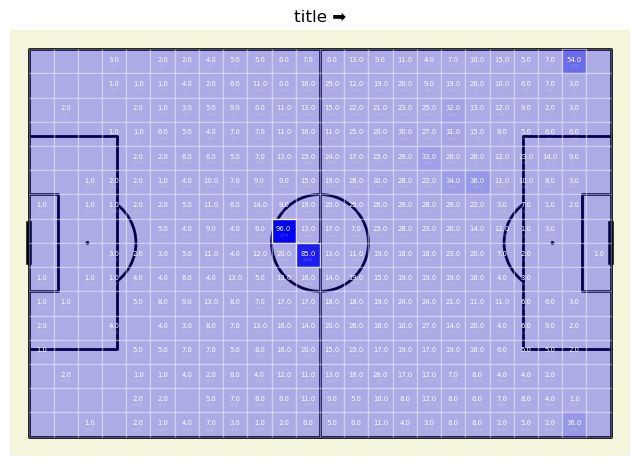

In [30]:
out_posloc_df = Generate_Positional_Location("Pass").query("position == 'ST'")
Draw_Pitch_Actions(out_posloc_df["count"], True, "../action_volume/data/location_df.csv").plot()

In [31]:
file_title = "96sq_Ligue1"
ATTRIBUTES_LIST = ["Pass","Shot","Dribble"]

for attribute in ATTRIBUTES_LIST:
    out_posloc_df = Generate_Positional_Location(attribute)
    out_posloc_df.to_csv(f"data/position_included_location_{file_title}_{attribute}.csv", index=False)

<br><br><br><br>
# Pass_Accurcay_by_Location

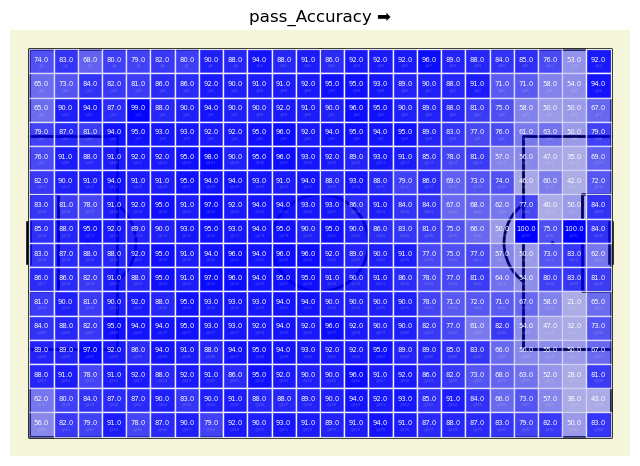

In [32]:
acc_df = master_events_df.query("type=='Pass'")
acc_df.pass_outcome.fillna("Successful", inplace=True)

pass_counts = acc_df.groupby('Pitch_Number')['pass_outcome'].value_counts().unstack(fill_value=0)
pass_counts['Success_Percentage'] = pass_counts["Successful"] / pass_counts.sum(axis=1) * 100
all_pitches = pd.DataFrame({'Pitch_Number': range(1, PITCH_TOTAL_SQUARES+2)})
success_percentage_df = all_pitches.merge(pass_counts['Success_Percentage'], on='Pitch_Number', how='left')
average_success_percentage = success_percentage_df['Success_Percentage'].mean()
success_percentage_df['Success_Percentage'].fillna(average_success_percentage, inplace=True)
for index, row in success_percentage_df.iterrows():
    if row['Success_Percentage'] == 0:
        pitch_number = row['Pitch_Number']
        surrounding_pitches = success_percentage_df[
            (success_percentage_df['Pitch_Number'] >= pitch_number - 5) & 
            (success_percentage_df['Pitch_Number'] <= pitch_number + 5) & 
            (success_percentage_df['Success_Percentage'] > 0)
        ]['Success_Percentage']
        
        if not surrounding_pitches.empty:
            average_value = surrounding_pitches.mean()
            success_percentage_df.at[index, 'Success_Percentage'] = average_value

success_percentage_df['Success_Percentage'] = round(success_percentage_df['Success_Percentage'], 0)
drawer = Draw_Pitch_Actions(success_percentage_df['Success_Percentage'], True, "data/96sq_Ligue1_Dribble.csv",ATTRIBUTE_TITLE="pass_Accuracy")
drawer.plot().save_fig("./IMG/pass_Accuracy.png")

success_percentage_df.to_csv("./accps.csv",index=False)

In [33]:
lig1=pd.read_csv("./data/Ligue1 22-23 Statsbomb Events Data.csv")

C:\Users\okany\AppData\Local\Temp\ipykernel_13352\1077380503.py:1: DtypeWarning: Columns (8,13,19,20,21,24,37,45,46,78,79,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113) have mixed types. Specify dtype option on import or set low_memory=False.
  lig1=pd.read_csv("./data/Ligue1 22-23 Statsbomb Events Data.csv")


In [34]:
lig1.query("type=='Shot'").shot_outcome.value_counts()

Off T               240
Saved               231
Blocked             212
Goal                108
Wayward              34
Post                 17
Saved Off Target      6
Saved to Post         3
Name: shot_outcome, dtype: int64

In [35]:
lig1.match_id.nunique()

32

In [36]:
lig1.query("type=='Shot'")

,50_50,ball_receipt_outcome,ball_recovery_recovery_failure,carry_end_location,clearance_aerial_won,clearance_body_part,clearance_head,clearance_left_foot,clearance_other,clearance_right_foot,...,goalkeeper_penalty_saved_to_post,block_save_block,Pos,y,x,pass_end_y,pass_end_x,Pitch_Number,pass_end_Pitch_Number,Pass_Stream
3574,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,AMR,97.1,29.9,NaN,NaN,140.0,NaN,"[140.0, nan]"
3575,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,AMC,107.7,49.1,NaN,NaN,238.0,NaN,"[238.0, nan]"
3576,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,DM,95.2,42.6,NaN,NaN,212.0,NaN,"[212.0, nan]"
3577,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,ST,100.5,37.3,NaN,NaN,189.0,NaN,"[189.0, nan]"
3578,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,ST,112.9,29.4,NaN,NaN,143.0,NaN,"[143.0, nan]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
128847,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,DM,98.7,39.3,NaN,NaN,188.0,NaN,"[188.0, nan]"
128848,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,MR,103.4,56.0,NaN,NaN,285.0,NaN,"[285.0, nan]"
128849,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,ST,104.9,29.1,NaN,NaN,141.0,NaN,"[141.0, nan]"
128850,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,ST,90.3,45.2,NaN,NaN,235.0,NaN,"[235.0, nan]"
